In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import camb
from camb import model, initialpower

In [20]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As = 2e-09, ns=0.965)
pars.set_matter_power(redshifts=[0.], kmax=2.0)
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)
results.calc_power_spectra(pars)
kh_nonlin, z_nonlin, pk_nonlin = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

In [21]:
pars_ml = camb.CAMBparams()
pars_ml.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.0, omk=0, tau=0.06)
pars_ml.InitPower.set_params(As = 2e-09, ns=0.965)
pars_ml.set_matter_power(redshifts=[0.], kmax=2.0)
pars_ml.NonLinear = model.NonLinear_none
results_ml = camb.get_results(pars_ml)
results_ml.calc_power_spectra(pars_ml)
kh_ml_nonlin, z_ml_nonlin, pk_ml_nonlin = results_ml.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

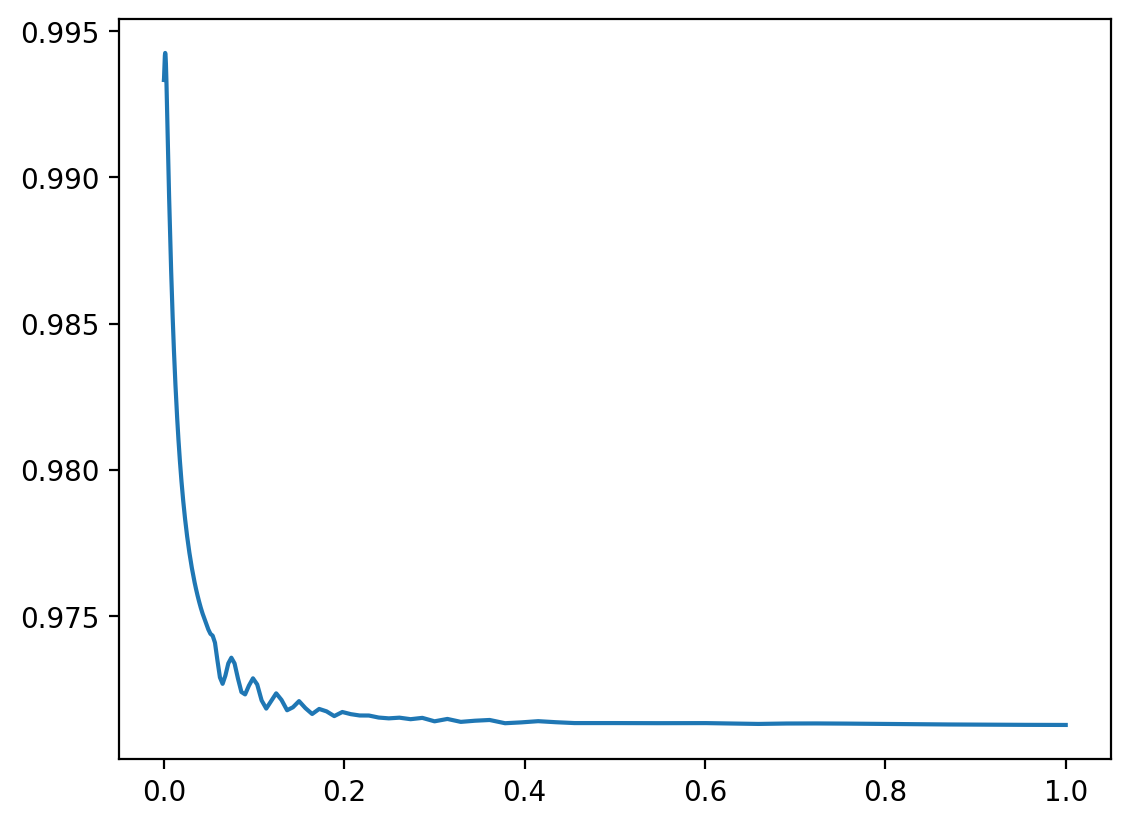

In [22]:
plt.plot(kh_nonlin, pk_nonlin[0] / pk_ml_nonlin[0])

In [23]:
sigma12_massless = results_ml.get_sigmaR(12, hubble_units=False)
print(sigma12_massless)
sigma12_massive = results.get_sigmaR(12, hubble_units=False)
print(sigma12_massive)

[0.80717813]
[0.79587563]


In [24]:
As_massless = 2e-9 * (sigma12_massless / sigma12_massive) ** 2

In [25]:
As_massless

array([2.05720872e-09])

In [26]:
pars_rescaled = camb.CAMBparams()
pars_rescaled.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06)
pars_rescaled.InitPower.set_params(As = As_massless, ns=0.965)
pars_rescaled.set_matter_power(redshifts=[0.], kmax=2.0)
pars_rescaled.NonLinear = model.NonLinear_none
results_rescaled = camb.get_results(pars_rescaled)
results_rescaled.calc_power_spectra(pars_rescaled)
kh_rescaled, z_rescaled, pk_rescaled = results_rescaled.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

In [27]:
sigma12_rescaled = results_rescaled.get_sigmaR(12, hubble_units=False)
print(sigma12_rescaled)

[0.80716557]


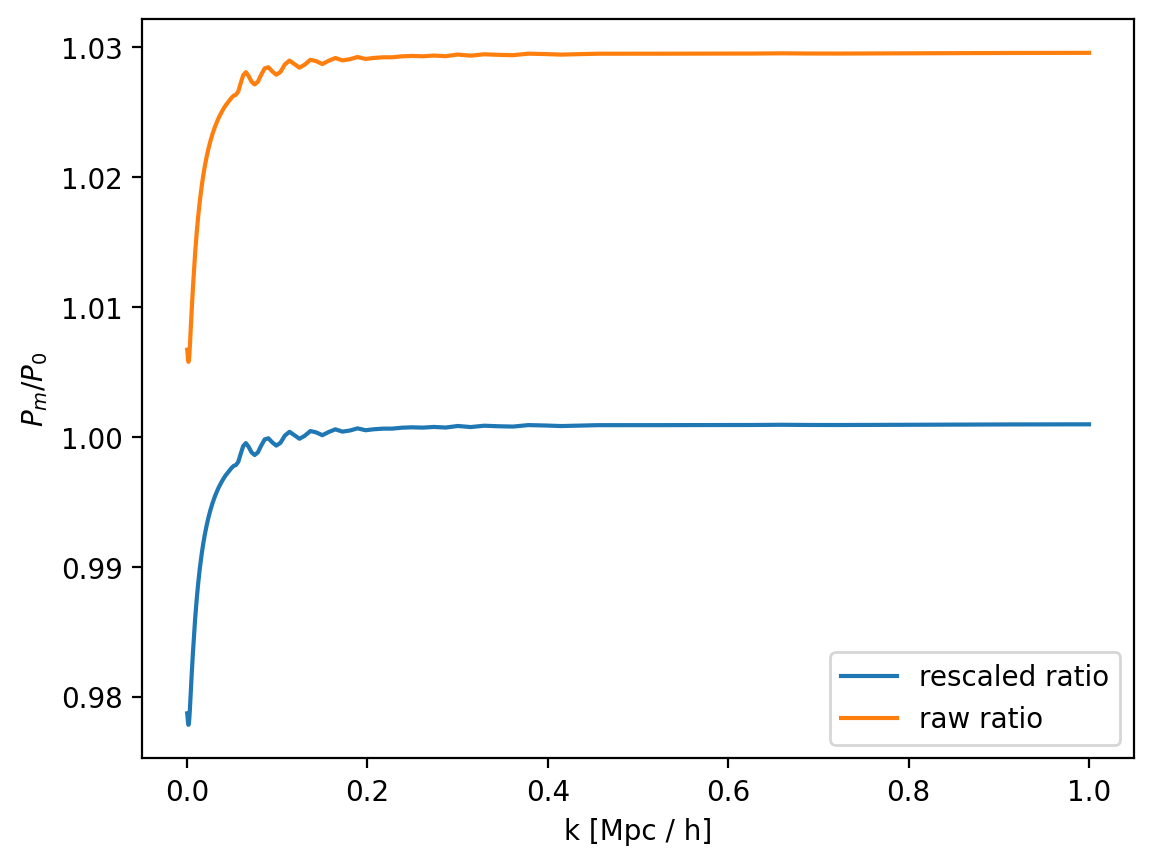

In [34]:
plt.plot(kh_nonlin, pk_ml_nonlin[0] / pk_rescaled[0], label="rescaled ratio")
plt.plot(kh_nonlin, pk_ml_nonlin[0] / pk_nonlin[0], label="raw ratio")
plt.xlabel(r"k [Mpc / h]")
plt.ylabel(r"$P_m / P_0$")
plt.legend()